<a href="https://colab.research.google.com/github/lucasfranca016/UTI_Sirio_Libanes/blob/main/notebook/projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação de bibliotecas:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_validate
from sklearn.metrics  import classification_report, plot_confusion_matrix
from sklearn.metrics import f1_score, make_scorer, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

import warnings
import sys
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')  
warnings.filterwarnings("ignore", category=RuntimeWarning) 
sys.path.append("../scripts/")

### Importação dos dados:

In [ ]:
dados = pd.read_excel("Kaggle_Sirio_Libanes_ICU_Prediction.xlsx")
dados

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1921,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
1922,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
1923,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0


In [ ]:
dados.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1925.000000
mean,192.000000,0.467532,0.368831,0.108333,0.028125,0.097917,0.019792,0.128125,0.046875,0.213021,...,-0.703683,-0.770338,-0.887196,-0.786997,-0.715950,-0.817800,-0.719147,-0.771327,-0.886982,0.267532
std,111.168431,0.499074,0.482613,0.310882,0.165373,0.297279,0.139320,0.334316,0.211426,0.409549,...,0.482097,0.319001,0.296147,0.324754,0.419103,0.270217,0.446600,0.317694,0.296772,0.442787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,192.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-0.976190,-0.979798,-1.000000,-0.984944,-0.989822,-1.000000,-0.975924,-0.980333,0.000000
75%,288.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.647059,-0.595238,-0.878788,-0.645482,-0.522176,-0.662529,-0.634409,-0.594677,-0.880155,1.000000
max,384.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###### Descrição da base:

Essa base de dados foi disponibilizada pelo Hospital Sírio-Libanês através da plataforma Kaggle. Ela está anonimizada e as informações que contam são o id do paciente incluído nela, o seu gênero, sua faixa etária, se ele possui determinadas doenças, resultados de testes feitos realizados como exame de sangue e análises de sinais vitais, a janela de horas após entrada no hospital e se o paciente está na UTI.


### Definição de funções:

In [ ]:
def prepare(rows):
    if(np.any(rows['ICU'])):
        rows.loc[rows['WINDOW'] == '0-2', 'ICU'] = 1
    
    return rows.loc[rows['WINDOW'] == '0-2']

In [ ]:
def remove_corr_var(dados, valor_corte):
    matriz_corr = dados.iloc[:,4:-2].corr().abs()
    matriz_upper = matriz_corr.where(np.triu(np.ones(matriz_corr.shape), k=1).astype(np.bool))
    excluir = [coluna for coluna in matriz_upper.columns if any(matriz_upper[coluna] > valor_corte)]
    
    return dados.drop(excluir, axis=1)

In [ ]:
def plot_matrix_confusion_modelos(nomemodelo, modelos, nrows, ncols):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16))
    axis = []
    for ax in axes:
        axis.extend(ax)
    axes_ind = 0
    trained_models = []
    for name, clf in zip(nomemodelo, modelos):
        clf.fit(x_train, y_train)
        trained_models.append(clf)
        disp = plot_confusion_matrix(clf, x_test, y_test, ax=axis[axes_ind])
        y_predict = clf.predict(x_test)
        y_predict_proba = clf.predict_proba(x_test)
        auc_score = roc_auc_score(y_test, y_predict_proba[:, 1])
        f1 = classification_report(y_test, y_predict ,output_dict=True)['0']['f1-score']
        axis[axes_ind].set_title(f'{name}, AUC = {auc_score:.2f}, F1 = {f1:.2f}')
        disp.im_.set_clim(0, 50)
        axes_ind += 1
    plt.show()
    for ax in axis[len(nomemodelo):]:
        ax.set_visible(False)
        fig.delaxes(ax)
    return trained_models

In [ ]:
def roda_modelo_cv_searchcv(modelo, parametros):
    
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
    
    modelo_score_roc = RandomizedSearchCV(modelo, param_distributions=parametros,
                              n_iter = 100, cv = cv, scoring='roc_auc', n_jobs=5,
                              return_train_score=True)
    
    modelo_score_f1 = RandomizedSearchCV(modelo, param_distributions=parametros,
                              n_iter = 100, cv = cv, scoring='f1', n_jobs=5,
                              return_train_score=True)
    
    modelo_score_roc.fit(x_train, y_train)
    
    resultados_roc = pd.DataFrame(modelo_score_roc.cv_results_)
    
    auc_medio = resultados_roc.iloc[modelo_score_roc.best_index_]['mean_test_score']
        
    print(f'Matriz de confusão para o algoritmo otimizado para AUC:')

    plot_confusion_matrix(modelo_score_roc, x_test, y_test)
    
    plt.show()
    
    print(f'Matriz de confusão para o algoritmo otimizado para F1:')
    
    modelo_score_f1.fit(x_train, y_train)
    
    resultados_f1 = pd.DataFrame(modelo_score_f1.cv_results_)
    
    f1_medio = resultados_f1.iloc[modelo_score_f1.best_index_]['mean_test_score']

    plot_confusion_matrix(modelo_score_f1, x_test, y_test)

    plt.show()
    
    print(f'AUC Médio: {auc_medio} e F1_Score Médio: {f1_medio}')

In [ ]:
def roda_modelo_cv_searchcv_mod(modelo, parametros):
    
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=6)
    
    modelo_score_f1 = RandomizedSearchCV(modelo, param_distributions=parametros,
                              n_iter = 200, cv = cv, scoring='f1', n_jobs=5,
                              return_train_score=True)
    
    print(f'Matriz de confusão para o algoritmo otimizado para F1:')
    
    modelo_score_f1.fit(x_train, y_train)
    
    resultados_f1 = pd.DataFrame(modelo_score_f1.cv_results_)
    
    f1_medio = resultados_f1.iloc[modelo_score_f1.best_index_]['mean_test_score']

    plot_confusion_matrix(modelo_score_f1, x_test, y_test)

    plt.show()
    
    y_predict_f1 = modelo_score_f1.predict(x_test)
    
    df_class = format_classification_report(y_test, y_predict_f1)
    
    print(f'F1_Score Médio: {f1_medio}')
    
    return df_class

In [ ]:
def format_classification_report(test, predict):
    df_cr = pd.DataFrame(classification_report(test, predict, output_dict=True)).T
    df_cr['precision']['accuracy'] = ''
    df_cr['recall']['accuracy'] = ''
    df_cr['support']['accuracy'] = df_cr['support']['macro avg']
    df_cr['support'] = df_cr['support'].astype('int32')
    return df_cr

### Tratamento dos dados:

Primeiramente temos que lidar com os valores vazios em nossa tabela, para isso irei separar a tabela de dados em partes e irei aplicar um método de preenchimento apenas nas colunas com valores vazios que são as colunas de numeração 13 até a antepenúltima, que seria a de numeração -2. O método de preenchimento que aplicarei aqui será separar esse preenchimento por paciente, logo, terei um recorte com todas as linhas de um paciente específico e com as colunas que quero retirar os valores vazios e então aplicarei um fillna : na linha de número "x" ele tentará preencher os valores vazios das linhas "x-1" e "x+1" replicando os seus próprios valores e em seguida o mesmo processo é feito para a linha "x+1". Como este recorte está sendo feito por parciente também os dados vazios de um paciente não podem ser preenchidos pelos dados de outro paciente.

In [ ]:
features_contable_columns = dados.iloc[:, 13:-2].columns

dados_muda = dados.iloc[:,13:-2]

dados_inicio = dados.iloc[:,0:13]

dados_final = dados.iloc[:,-2:]

for i in range(0,385):
    
    recorte = dados.query("PATIENT_VISIT_IDENTIFIER == @i")
    
    index = recorte.index
    
    dados_muda.iloc[index[0]:index[-1]+1,:] = recorte.loc[index[0]:index[-1]+1][
                features_contable_columns].fillna(method='bfill').fillna(method='ffill')
            
dados_limpos = pd.concat([dados_inicio, dados_muda, dados_final], ignore_index=True, axis=1)

dados_limpos.columns = dados.columns

In [ ]:
dados_limpos.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-0.389967,0.407558,-0.230462,0.096774,-1.000000,-1.000000,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-0.389967,0.407558,-0.230462,0.096774,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1


In [ ]:
dados_limpos.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1925.000000
mean,192.000000,0.467532,0.368831,0.108333,0.028125,0.097917,0.019792,0.128125,0.046875,0.213021,...,-0.758150,-0.812388,-0.910214,-0.818008,-0.759122,-0.848720,-0.771187,-0.813295,-0.910085,0.267532
std,111.168431,0.499074,0.482613,0.310882,0.165373,0.297279,0.139320,0.334316,0.211426,0.409549,...,0.433588,0.296775,0.255728,0.301726,0.389598,0.247117,0.401430,0.295619,0.256368,0.442787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,192.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
75%,288.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.705882,-0.690476,-0.919192,-0.710805,-0.622483,-0.764487,-0.725806,-0.698390,-0.918403,1.000000
max,384.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Podemos ver que o número de linhas com valor para cada coluna aumentou bastante , contudo em algumas colunas ainda existem 5 linhas sem valor. 

Em seguida irei retirar os dados dos pacientes que já foram internados na primeira hora, pois os dados de seus exames representam dados de um paciente que já está na UTI, assim, não podemos os usar para prever algo. Também irei retirar as linhas que possuem valores vazios ainda.

In [ ]:
remover = dados_limpos.query("WINDOW=='0-2' and ICU==1")['PATIENT_VISIT_IDENTIFIER'].values
dados_limpos = dados_limpos.query("PATIENT_VISIT_IDENTIFIER not in @remover")
dados_limpos = dados_limpos.dropna()
dados_limpos

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-0.389967,0.407558,-0.230462,0.096774,-1.000000,-1.000000,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-0.389967,0.407558,-0.230462,0.096774,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1921,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
1922,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
1923,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0


Em seguida darei groupby por ID do paciente e irei aplicar a função prepare, que identifica se um paciente em algum momento foi para a UTI e em seguida se o paciente tiver ido ele muda o valor da coluna UCI para 1 na linha referente à janela das duas primeiras horas do paciente. Logo, excluirei as linhas referentes às janelas além das duas primeiras horas para todos os pacientes.

Também irei transformar a coluna da faixa etária em valores númericos referentes a cada grupo para utilizarmos como treino também.

In [ ]:
dados_limpos = dados_limpos.groupby("PATIENT_VISIT_IDENTIFIER").apply(prepare)
dados_limpos['AGE_PERCENTIL'] = dados_limpos['AGE_PERCENTIL'].astype('category').cat.codes
dados_limpos

,,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
2,10,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,0-2,1
3,15,3,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
4,20,4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.952381,-0.979798,-1.000000,-0.883669,-0.956805,-0.870968,-0.953536,-0.980333,0-2,0
5,25,5,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.976190,-0.979798,-0.860870,-0.714460,-0.986481,-1.000000,-0.975891,-0.980129,0-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,1900,380,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
381,1905,381,1,9,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.619048,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.612627,-1.000000,0-2,0
382,1910,382,0,4,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1


Vou agora usar uma função para remover algumas colunas usando o critério de correlação, ao achar 2 colunas com correlação entre si maior que um limite estipulado uma delas é removida, assim, as colunas que restarem em nossos dados serão colunas menos homogêneas, também diminuindo o ruído a ser incorporado em nosso algoritmo.

Aqui usarei o limite como 0.9, ou seja, se uma coluna possui mais de 90% de correlação com outra uma delas será removida.

In [ ]:
dados_limpos_semcorr = remove_corr_var(dados_limpos, 0.90)

In [ ]:
dados_limpos_semcorr.head()

,,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.285714,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
2,10,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.357143,0.935673,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,0-2,1
3,15,3,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.285714,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
4,20,4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.285714,0.868421,-1.000000,-0.877301,-0.923664,-0.882353,-0.952381,-0.979798,0-2,0
5,25,5,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.196429,0.815789,-0.826087,-0.754601,-0.984733,-1.000000,-0.976190,-0.979798,0-2,0


Assim como resultado final temos uma linha referente a cada paciente com as informações sobre as suas 2 primeiras horas de estadia no hospital e se ele foi caminhado para UTI. Logo, temos uma base coerente para treinar um modelo que possui a finalidade de prever a ida de um paciente para a UTI.

### Métrica de comparação:

Sabemos que em nosso problema é muito importante prevermos quando um paciente vai para UTI mas tão importante quanto isso é sabermos ser precisos quando falamos que um paciente não precisar ir para a UTI. Caso nosso modelo preveja que um certo paciente não precisará ir para a UTI erroniamente o mesmo pode vir a óbito pois medidas preventivas podem ter sido deixadas de lado. Portanto, uma medida muito importante é o número de falsos positivos do nosso modelo.

Também usaremos outras duas métricas o F1 Score e o ROC AUC Score. O ROC é uma medida que leva em conta a taxa de falsos positivos e a taxa de verdadeiros positivos para construir uma curva, então o ROC AUC Score mede a área abaixo desta curva, que quanto maior indica o quão um modelo tem taxas grandes de verdadeiros positivos e taxas baixas de falso positivo. O F1 Score é uma média harmônica de precisão e recall, sendo reccal tendo relação com a taxa de falsos positivos e falsos negativos, logo esse score nos demonstra o quão bom são a precisão e o recall de um modelo, caso um desses índices seja muito baixo o score terá um valor muito baixo por se tratar de uma média harmônica.

### Modelo:

Primeiramente irei retirar as colunas obsoletas e definirei quais colunas serão as informações de treino é a variável a ser prevista. Também embaralhei um pouco as linhas da base de dados para evitar qualquer tipo de viés. Em seguida defini uma random.seep para que os testes aqui feitos possam ser reprodutíveis e dividi os dados em dados de treino e teste para então plotar uma matriz de confusão inicial para obter um panorama inicial de como se comportam os modelos sem parâmetros inseridos.

In [ ]:
dados_limpos_semcorr = dados_limpos_semcorr.sample(frac=1).reset_index(drop=True)
x_columns = dados_limpos_semcorr.columns[:-1]

x=dados_limpos_semcorr[x_columns].drop(['PATIENT_VISIT_IDENTIFIER', 'WINDOW'], axis=1)
y=dados_limpos_semcorr['ICU']

np.random.seed(98123)

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)

In [ ]:
nomemodelo = ["Decision Tree", "Random Forest", "K Neighbors", "GBClassifier", "AdaBoost"]

modelos = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
]

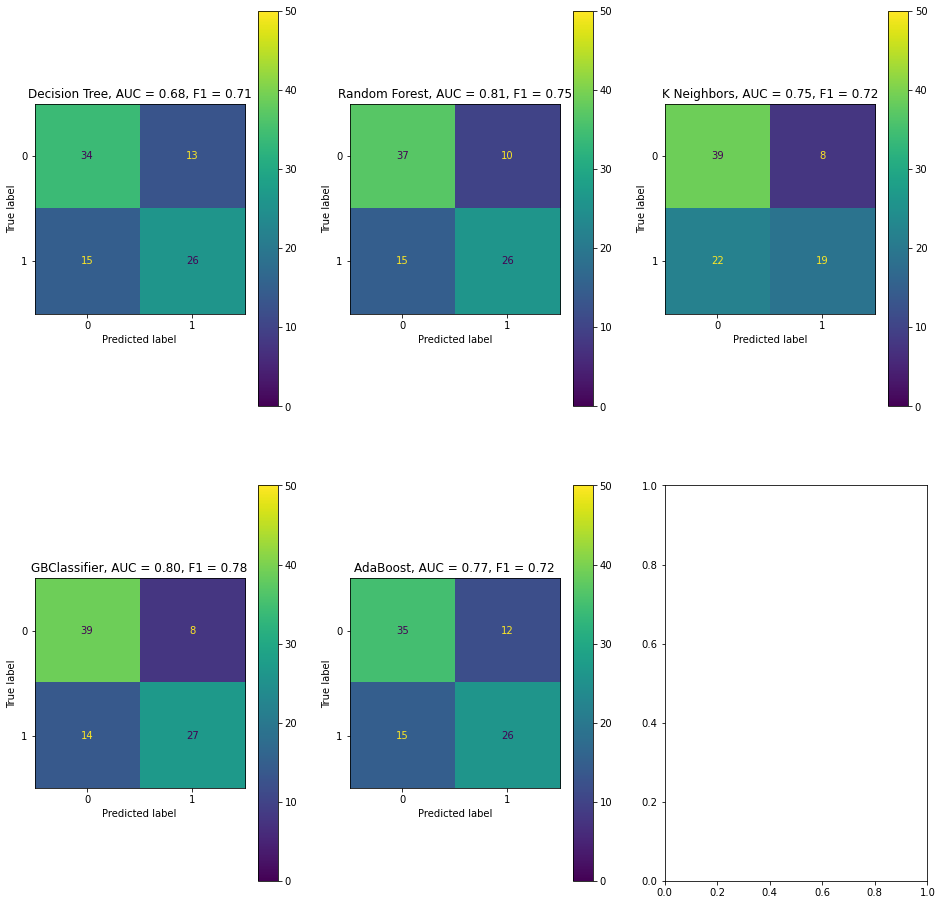

[DecisionTreeClassifier(),
 RandomForestClassifier(),
 KNeighborsClassifier(),
 GradientBoostingClassifier(),
 AdaBoostClassifier()]

In [ ]:
plot_matrix_confusion_modelos(nomemodelo, modelos, 2, 3)

RandomForest, K neighbours e GBClassifier apresentaram as melhores métricas. GBClassifier e Random Forest apresentaram o menor número de falsos negativos.

Agora irei testar cada modelo de forma particular, utilizando um algoritmo que utiliza o RandomizedSearchCV para achar a melhor parametrização do modelo baseando-se na medida de alguma métrica aliado a um método de Cross Validation que é repetido 10 vezes, tudo para que as flutuações entre os resultados seja minimizada. Eu realizei esse procedimento para as 2 métricas, logo, ao final do ciclo irão ser plotados 2 matrizes de confusão para cada modelo, cada uma referente à optmização de uma das métricas, assim como o próprio valor de cada métricas para seu modelo otimizado específico.

Os parâmetros modificados nos estudos bem como seus valores foram decididos pesquisando sobre na documentação do sklearn, bem como em referências sobre otimização desses modelos e também de trabalhos de terceiros.

A primeira matriz de confusão é referente ao ROC AUC Score e a segunda se refere ao F1 Score, apesar das duas estarem escrito AUC.

###### Decision Tree:


Matriz de confusão para o algoritmo otimizado para AUC:


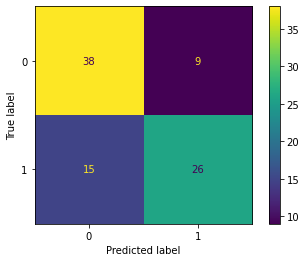

Matriz de confusão para o algoritmo otimizado para AUC:


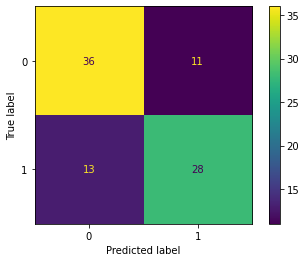

AUC Médio: 0.6919907430213464 e F1_Score Médio: 0.6601221350677153


In [ ]:
modelo_tree = DecisionTreeClassifier()
tree_parametros = {
    "max_depth" : sp_randInt(1, 10),
    "min_samples_leaf" : sp_randInt(1, 50),
    "min_samples_split" : sp_randInt(2, 30)
}

roda_modelo_cv_searchcv(modelo_tree, tree_parametros)

###### Random Forest:

Matriz de confusão para o algoritmo otimizado para AUC:


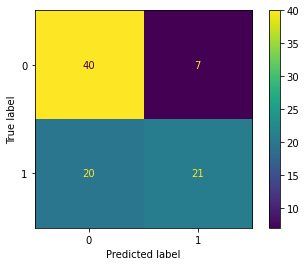

Matriz de confusão para o algoritmo otimizado para AUC:


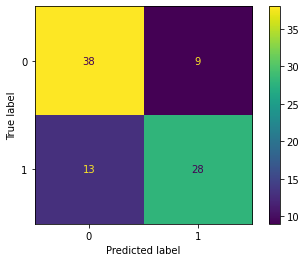

AUC Médio: 0.8089543103448275 e F1_Score Médio: 0.716668730450501


In [ ]:
modelo_forest = RandomForestClassifier()
forest_parametros = {
    "n_estimators" : sp_randInt(100, 400),
    "max_depth" : sp_randInt(1, 10),
    "min_samples_leaf" : sp_randInt(1, 50),
    "min_samples_split" : sp_randInt(2, 30),
    "bootstrap" : [True, False]
}

roda_modelo_cv_searchcv(modelo_forest, forest_parametros)

###### K.neighbours:

Matriz de confusão para o algoritmo otimizado para AUC:


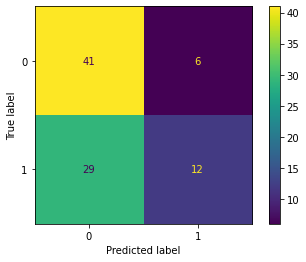

Matriz de confusão para o algoritmo otimizado para AUC:


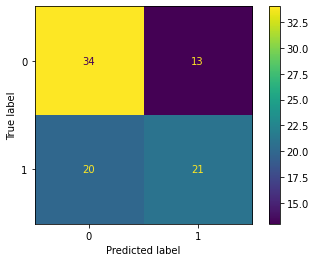

AUC Médio: 0.7184502873563217 e F1_Score Médio: 0.5627062192672737


In [ ]:
modelo_KNC = KNeighborsClassifier()
KNC_parametros = {
    "n_neighbors" : sp_randInt(3, 10),
    "p" : sp_randInt(1, 8),
    "leaf_size" : sp_randInt(15, 80)
}

roda_modelo_cv_searchcv(modelo_KNC, KNC_parametros)

###### GBClassifier :

Matriz de confusão para o algoritmo otimizado para AUC:


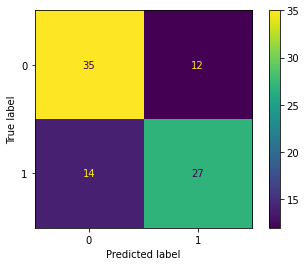

Matriz de confusão para o algoritmo otimizado para AUC:


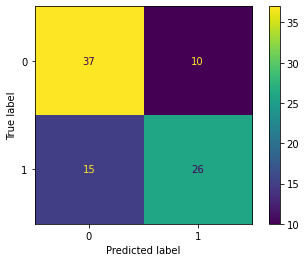

AUC Médio: 0.7977408866995076 e F1_Score Médio: 0.6982470319131677


In [ ]:
modelo_GNC = GradientBoostingClassifier()
GBC_parametros = {
    "min_samples_split" : sp_randInt(2, 30),
    "min_samples_leaf" : sp_randInt(1, 50),
    "max_depth" : sp_randInt(1, 10),
    "max_leaf_nodes" : sp_randInt(1, 300),
    "max_features" : sp_randInt(5, 98),
    "min_weight_fraction_leaf" : sp_randInt(0, 4)
}

roda_modelo_cv_searchcv(modelo_GNC, GBC_parametros)

###### AdaBoost:

Matriz de confusão para o algoritmo otimizado para AUC:


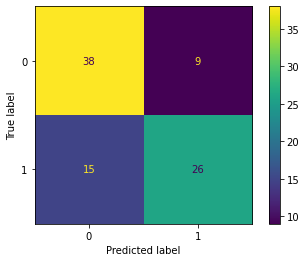

Matriz de confusão para o algoritmo otimizado para AUC:


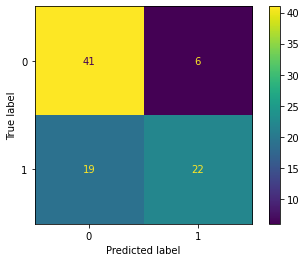

AUC Médio: 0.7382214285714287 e F1_Score Médio: 0.6438840169136434


In [ ]:
modelo_ABC = AdaBoostClassifier()
ABC_parametros = {
    "n_estimators" : sp_randInt(25, 300),
    "learning_rate" : sp_randFloat(0.5, 3)
}

roda_modelo_cv_searchcv(modelo_ABC, ABC_parametros)

Analisando os resultados podemos ver que os dois modelos que obtiveram o melhor ROC AUC Score foram também os dois que obtiveram o melhor F1 Score, que foram os modelos RandomForest e o GBClassifier. Dentre eles o modelo RandomForest se sobressaiu, ainda possuindo menor número de Falsos Negativos quando optimizado pela métrica F1 Score, logo, irei seguir fazendo uma análise parâmetrica mais ampla para esses 2 modelos utilizando somente a métrica F1 Score pois melhor se sobressaiu reduzindo o número de Falsos Negativos. Além disso dobrarei o número de iterações no RandomizedSearchCV porque também irei aumentar o limite dos parâmetros testadas para cada modelo. Por fim, também dimínui o número de iterações do cross validation por questões de tempo.

##### Random Forest:

Matriz de confusão para o algoritmo otimizado para F1:


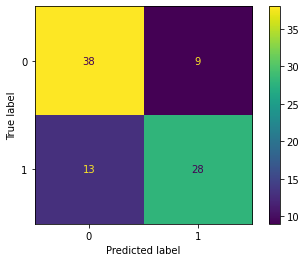

F1_Score Médio: 0.7075247649518077


In [ ]:
modelo_forest = RandomForestClassifier()
forest_parametros = {
    "n_estimators" : sp_randInt(100, 2000),
    "max_depth" : sp_randInt(1, 15),
    "min_samples_leaf" : sp_randInt(1, 200),
    "min_samples_split" : sp_randInt(2, 200),
    "bootstrap" : [True, False]
}

df_forest = roda_modelo_cv_searchcv_mod(modelo_forest, forest_parametros)

Matriz de confusão para o algoritmo otimizado para F1:


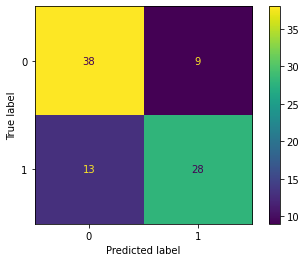

F1_Score Médio: 0.6884098132619217


In [ ]:
modelo_GNC = GradientBoostingClassifier()
GBC_parametros = {
    "min_samples_split" : sp_randInt(2, 200),
    "min_samples_leaf" : sp_randInt(1, 200),
    "max_depth" : sp_randInt(1, 15),
    "max_leaf_nodes" : sp_randInt(1, 500),
    "max_features" : sp_randInt(5, 98),
    "min_weight_fraction_leaf" : sp_randFloat(0, 5)
}

df_GBC = roda_modelo_cv_searchcv_mod(modelo_GNC, GBC_parametros)

###### Resultado:

Como se pode observar, esta análise secundário não nos gerou resultados significantes, apenas custo de tempo. Os resultados apresentar foram bem parecidos com os da análise anterior.

O resultado final foi de que os dois modelos atingiram um F1 Score muito próximo, ambos também com um número de falsos negativos igual. Contudo, devido ao fato do Score do modelo de Random Forest ser maior eu o indicaria como o modelo a ser usado primordialmente, mesmo seu tempo de processamento sendo bem superior ao dos outros modelos testados.